# Make UMAPs

Both HBECs and PBMCs

In [1]:
import scanpy as sc
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from pybedtools import BedTool
import pickle as pkl
%matplotlib inline

In [2]:
import sys
sys.path.append('/home/ssm-user/Github/scrna-parameter-estimation/dist/memento-0.0.5-py3.8.egg')
sys.path.append('/home/ssm-user/Github/misc-seq/miscseq/')
import encode
import memento

In [3]:
data_path = '/data_volume/ifn_hbec/'
fig_path = '/home/ssm-user/Github/scrna-parameter-estimation/figures/fig4/main/'

### Read the processed RNA data

Focus on the club and bc/club cells and type I interferons for now.

Encode the timestamps to integers.

In [12]:
adata_processed = sc.read(data_path + 'HBEC_type_I_processed_deep.h5ad')

In [4]:
adata = sc.read(data_path + 'HBEC_type_I_filtered_counts_deep.h5ad')

In [5]:
adata = adata[:, ~adata.var.index.str.startswith('MT-')].copy()
adata.obs['cell_type'] = adata.obs['cell_type'].apply(lambda x: x if x != 'basal/club' else 'bc')
adata.obs['cell_type'] = adata.obs['cell_type'].apply(lambda x: x if x != 'ionocyte/tuft' else 'ion-tuft')

/home/ssm-user/anaconda3/envs/single_cell/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [6]:
adata.shape

(69958, 36588)

### Make large UMAPs


In [24]:
sc.settings.figdir = fig_path

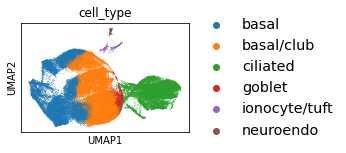

In [26]:
fig, ax = plt.subplots(figsize=(3,2))
sc.pl.umap(adata_processed, color='cell_type', legend_fontsize='x-large', ax=ax, save='_celltype.png')

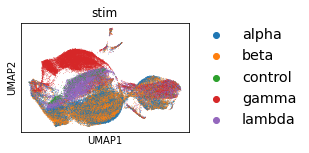

In [25]:
fig, ax = plt.subplots(figsize=(3,2))
sc.pl.umap(adata_processed, color='stim', legend_fontsize='x-large', ax=ax, save='_stim.png')